## draw trees

In [22]:
source('drawtrees.R')    
library("plyr") 
library("phytools")
theme_update(plot.title = element_text(hjust = 0.5))

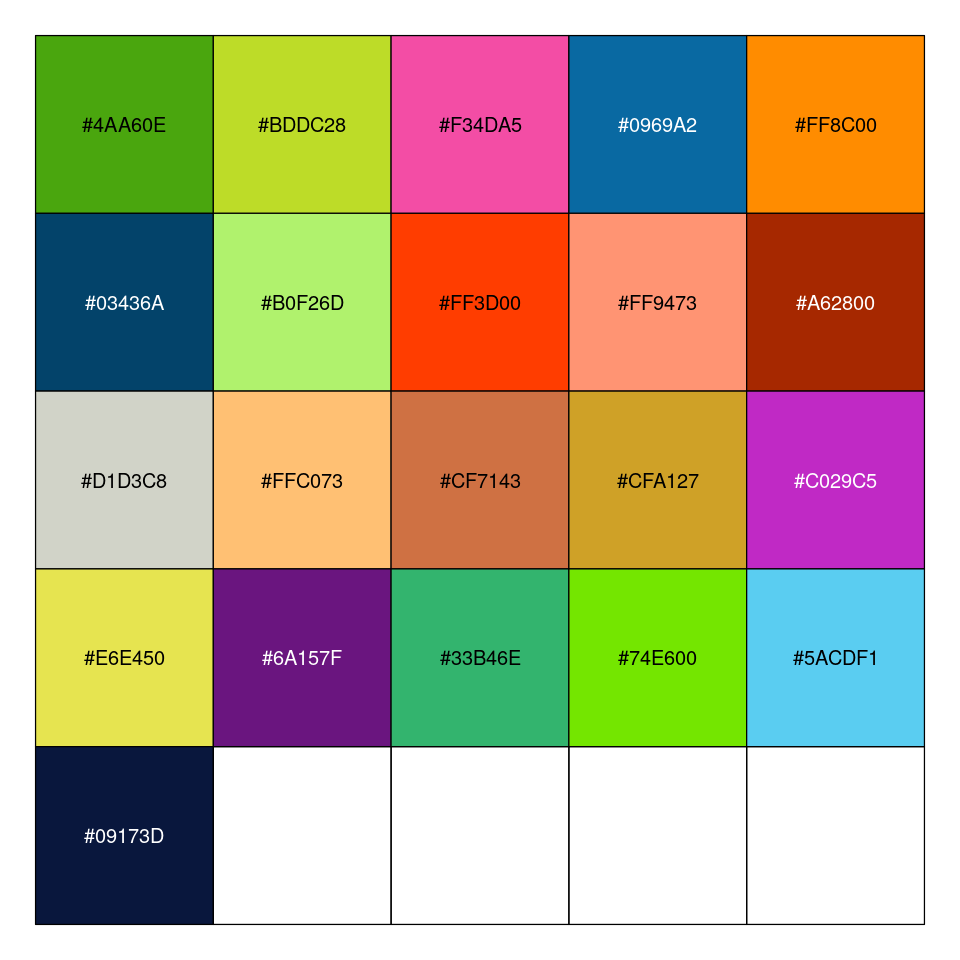

In [23]:
mycolors <- c(
  'Ireland'= "#4AA60E",
  'Scotland'= "#BDDC28",
  'Germany' = "#F34DA5",
  'Finland' = "#0969A2",
  'Poland' = "#FF8C00",
  'Netherlands' = "#03436A",
  'Lithuania' = "#B0F26D",  
  'New Zealand' = "#FF3D00",
  'Canada' = "#FF9473",
  'France' = "#A62800",
  'Russia' = "#D1D3C8",
  'Ethiopia' = "#FFC073",
  'Australia' = "#CF7143",
  'Israel' = "#CFA127",
  'Denmark'= "#C029C5",
  'Sweden'="#E6E450",
  'Belgium'="#6A157F",
  'Spain'="#33B46E",
  'China'="#74E600",
  'USA' = "#5ACDF1",
  'Europe'="#09173D" )

options(repr.plot.width=8, repr.plot.height=8)
library(scales)
show_col(mycolors)

In [69]:
gmeta <- read.csv('global_meta.csv',row.names=1)
gmeta[] <- lapply(gmeta, as.character)
gmeta$ST <- as.character(gmeta$ST)

In [4]:
setwd('/other/catherine')
meta <- read.table('metadata_all.csv',sep=',',
                      header=TRUE,row.names=1)
#meta[] <- lapply(meta, as.character)

## ref alignment tree - not reliable?

In [ ]:
tree <- read.tree('results/tree.newick')
tree <- drop.tip(tree, c('pure'))
#tree <- root(tree,'ref')
#tree <- drop.tip(tree, c('ref'))

In [ ]:
options(repr.plot.width=15, repr.plot.height=9) 
tree2 <- read.tree('results/newtree/tree.newick')
#tree2 <- drop.tip(tree2, c('ref','pure'))
tree2 <- root(tree2,'ref')
p <- ggplottree(tree2, gmeta, layout='rect', colors=mycolors, cols=c('country','ST'), 
           cmaps=c('Set1','Set2'), tipsize=5, tiplabel=TRUE,tiplabelsize=4,#tiplabelcol='strain',
                offset=3000, tipoffset=1000, align=TRUE)#+ xlim(NA, 2500)
p

In [ ]:
options(repr.plot.width=15, repr.plot.height=9) 
p <- ggplottree(tree, gmeta, layout='rect', colors=mycolors, cols=c('country','ST'), 
           cmaps=c('Set1','Set2'), tipsize=5, tiplabel=TRUE,tiplabelsize=4,#tiplabelcol='strain',
                offset=3000, tipoffset=1000, align=TRUE)#+ xlim(NA, 2500)
p

In [580]:
#mrca <- findMRCA(tree, c('245','SRR12674172'))
mrca <- findMRCA(tree, c('223','SRR10958113'))
tr <- extract.clade(tree,mrca)
mrca

[1] 50

In [ ]:
ggtree(tree) + geom_text(aes(label=node), hjust=-.3) + geom_tiplab(align=TRUE)

In [ ]:
#mrca <- findMRCA(tree2, c('223','245'))
mrca <- findMRCA(tree2, c('227','245'))
#tr <- extract.clade(tree2,mrca)

options(repr.plot.width=10, repr.plot.height=5)
p<-ggplottree(tr, gmeta, layout='rect', colors=mycolors, cols=c('country'), 
           cmaps=c('Set1','Set2'),tipsize=5, tiplabel=TRUE,tipoffset=1, tiplabelcol='strain')
#p +  geom_text(aes(label=node), hjust=-.3) 
#p<- collapse(p,66)
p

## New Zealand

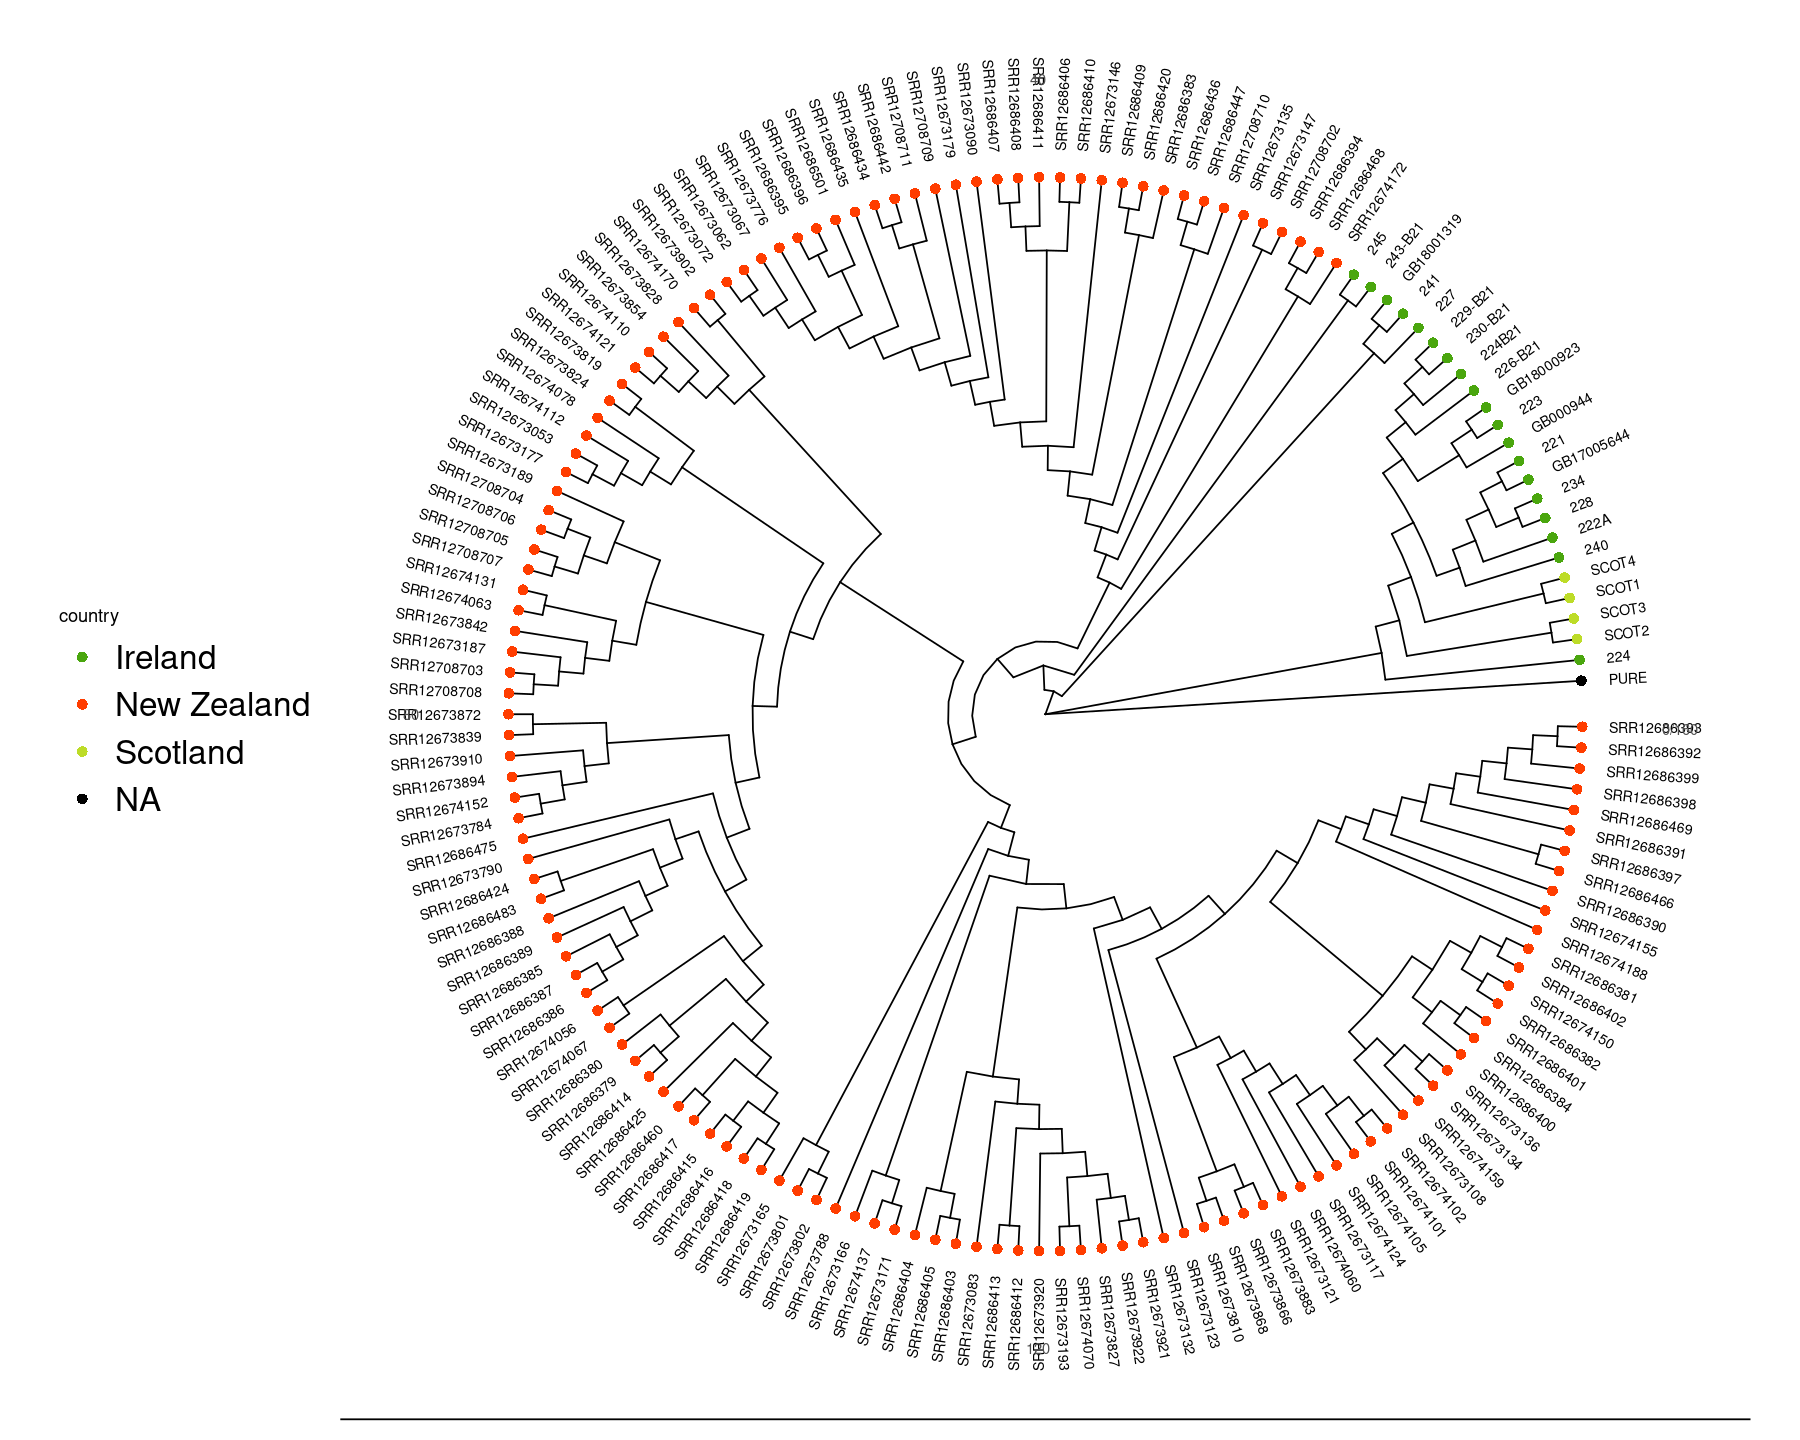

In [30]:
nztree <- read.tree('panaroo_NZ/tree.newick')
nztree <- root(nztree,'PURE')
options(repr.plot.width=15, repr.plot.height=12)
ggplottree(nztree, gmeta, layout='cladogram', cols=c('country'), colors=mycolors,
           cmaps=c('Set1'),tipsize=3, tiplabel=TRUE,tiplabelsize=3,tipoffset=1)# + xlim(NA,1200)

## panaroo core alignment

In [25]:
options(repr.plot.width=18, repr.plot.height=12)
ctree <- read.tree('panaroo_global/RAxML_bipartitions.variants')
ctree <- root(ctree,'NC_009497')
#ctree <- root(ctree,'GCA_009849465')
ctree<-drop.tip(ctree,'NC_009497')

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message:
“The following aesthetics were dropped during statistical transformation: node and parent.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: node and parent.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: node and parent.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
Warning

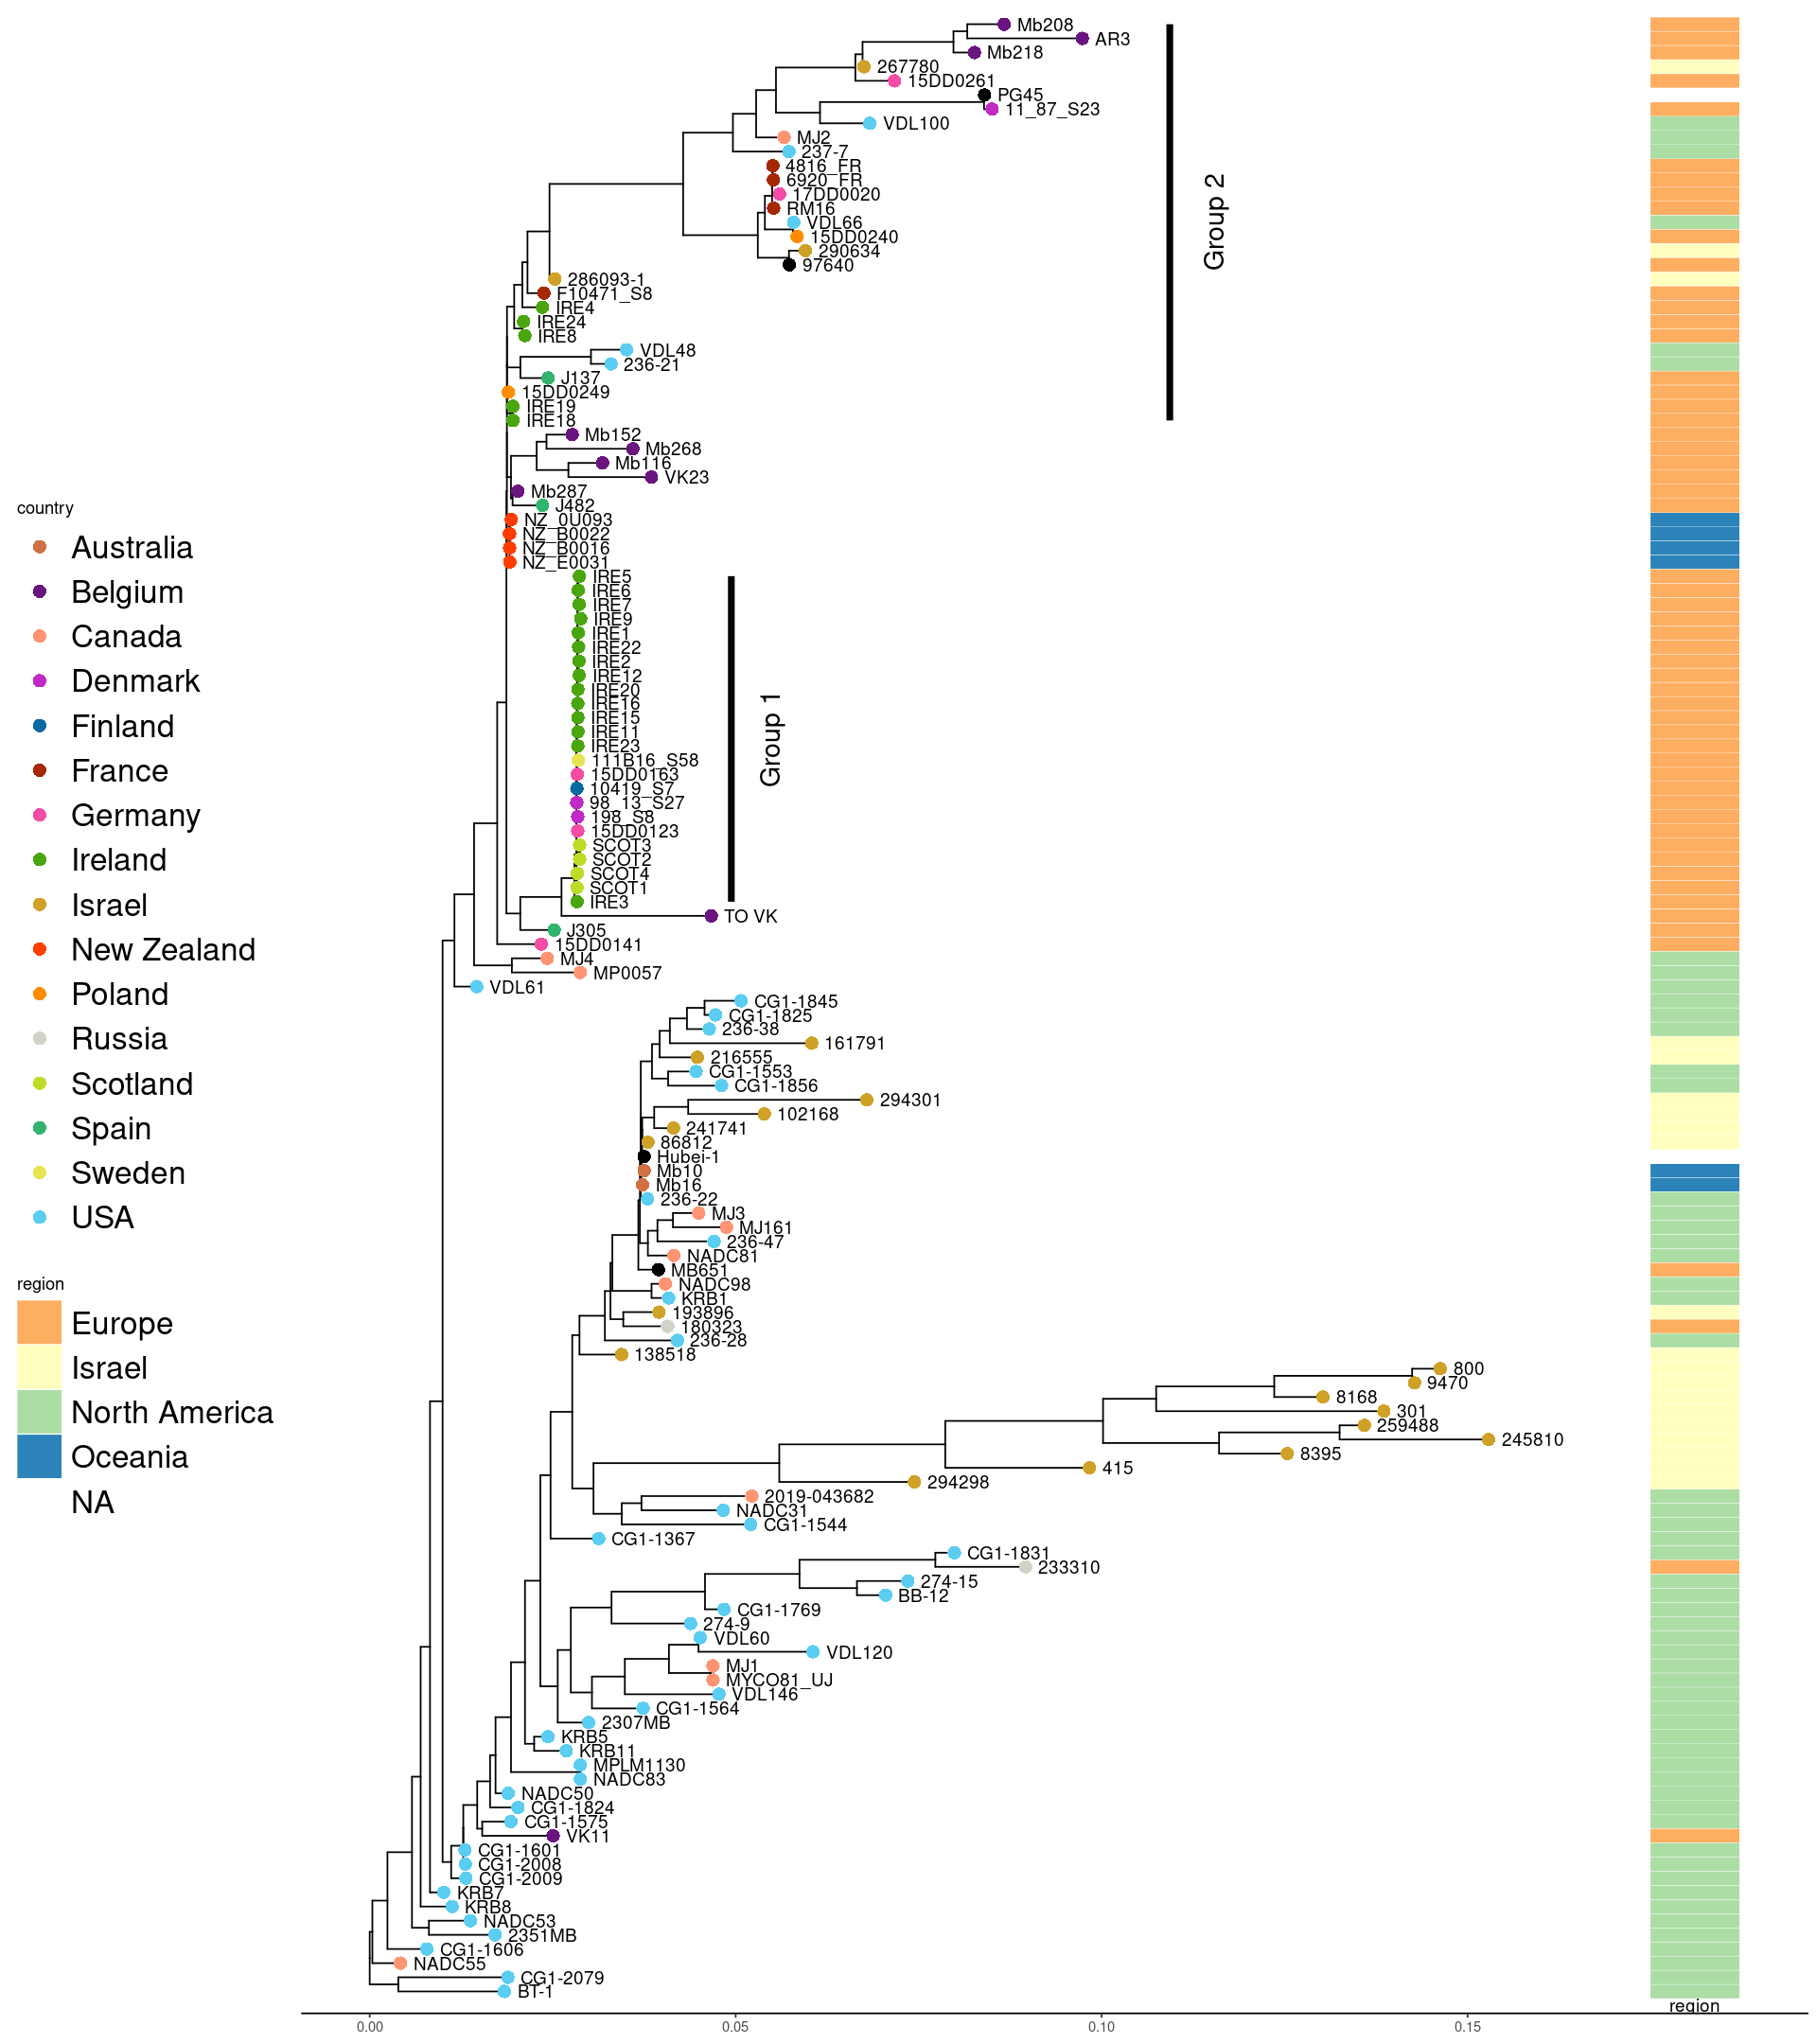

In [78]:
options(repr.plot.width=16, repr.plot.height=18)
tr<-ctree
p <- ggplottree(tr, gmeta, layout="rect", colors=mycolors,
           cols=c('country','region'), cmaps=c('Set1','Spectral'), tiplabel=TRUE, tiplabelcol='strain',
           tipsize=4,offset=.008,tipoffset=.001,tiplabelsize=4)
#p <- collapse(p, node=162)
p <- p + 
  geom_cladelabel(getMRCA(tr,c('224','228')), "Group 1", offset=.02, barsize=2, angle=90, offset.text=.005, hjust=0.5, fontsize=6)
p <- p + 
  geom_cladelabel(getMRCA(tr,c('245','227')), "Group 2", offset=.01, barsize=2, angle=90, offset.text=.005, hjust=0.5, fontsize=6)
p #+ geom_text(aes(label=node), hjust=-.3)

#ggsave(filename = "figure1.pdf" , device="pdf", width=12, height=18 , units="in" , limitsize=FALSE)

In [ ]:
tr<-extract.clade(ctree, 202)
options(repr.plot.width=16, repr.plot.height=12)
p<- ggplottree(tr, gmeta, layout='rect',  colors=mycolors, cols=c('country','ST'), cmaps=c('Set1','Set3'),
          tipsize=4, tiplabel=TRUE,tiplabelsize=4,tipoffset=.0001,offset=.005,tiplabelcol='strain')

p <- p + 
  geom_cladelabel(getMRCA(tr,c('224','228')), "Clade 1", offset=.01, barsize=2, angle=90, offset.text=.001, hjust=0.5, fontsize=6)
p <- p + 
  geom_cladelabel(getMRCA(tr,c('245','227','SRR12686435')), "Clade 2", offset=.01, barsize=2, angle=90, offset.text=.001, hjust=0.5, fontsize=6)
p# + geom_text(aes(label=node), hjust=-.3)

In [ ]:
options(repr.plot.width=14, repr.plot.height=6)
mrca <- findMRCA(ctree, c('224','SCOT1'))
tr <- extract.clade(ctree,mrca)
p<-ggplottree(tr, gmeta, layout='rect', colors=mycolors, cols=c('country'), 
           cmaps=c('Set1','Set2'),tipsize=5, tiplabel=TRUE,tiplabelsize=6,tipoffset=1e-5, tiplabelcol='strain')+ xlim(NA, 0.001)
p+geom_nodelab(size = 4, color= "red")+ggtitle('Clade 1 (ST=29)')

options(repr.plot.width=14, repr.plot.height=6)
mrca <- findMRCA(ctree, c('241','245','SRR12686435'))
tr <- extract.clade(ctree,mrca)
p<-ggplottree(tr, gmeta, layout='rect', colors=mycolors, cols=c('country'), 
           cmaps=c('Set1','Set2'),tipsize=5, tiplabel=TRUE,tiplabelsize=6,tipoffset=1e-4, tiplabelcol='strain')+ xlim(NA, 0.03)
p<- collapse(p,45)
p+geom_nodelab(size = 4, color= "red")+ggtitle('Clade 2 (ST=21)') 

#p + geom_text(aes(label=node), hjust=-.3)


## node labels

In [ ]:
options(repr.plot.width=20, repr.plot.height=12)
p<-ggtree(tr, layout='rect') + geom_text(aes(label=node), hjust=-.3) + geom_tiplab()
#p <- collapse(p, node=162)
p

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


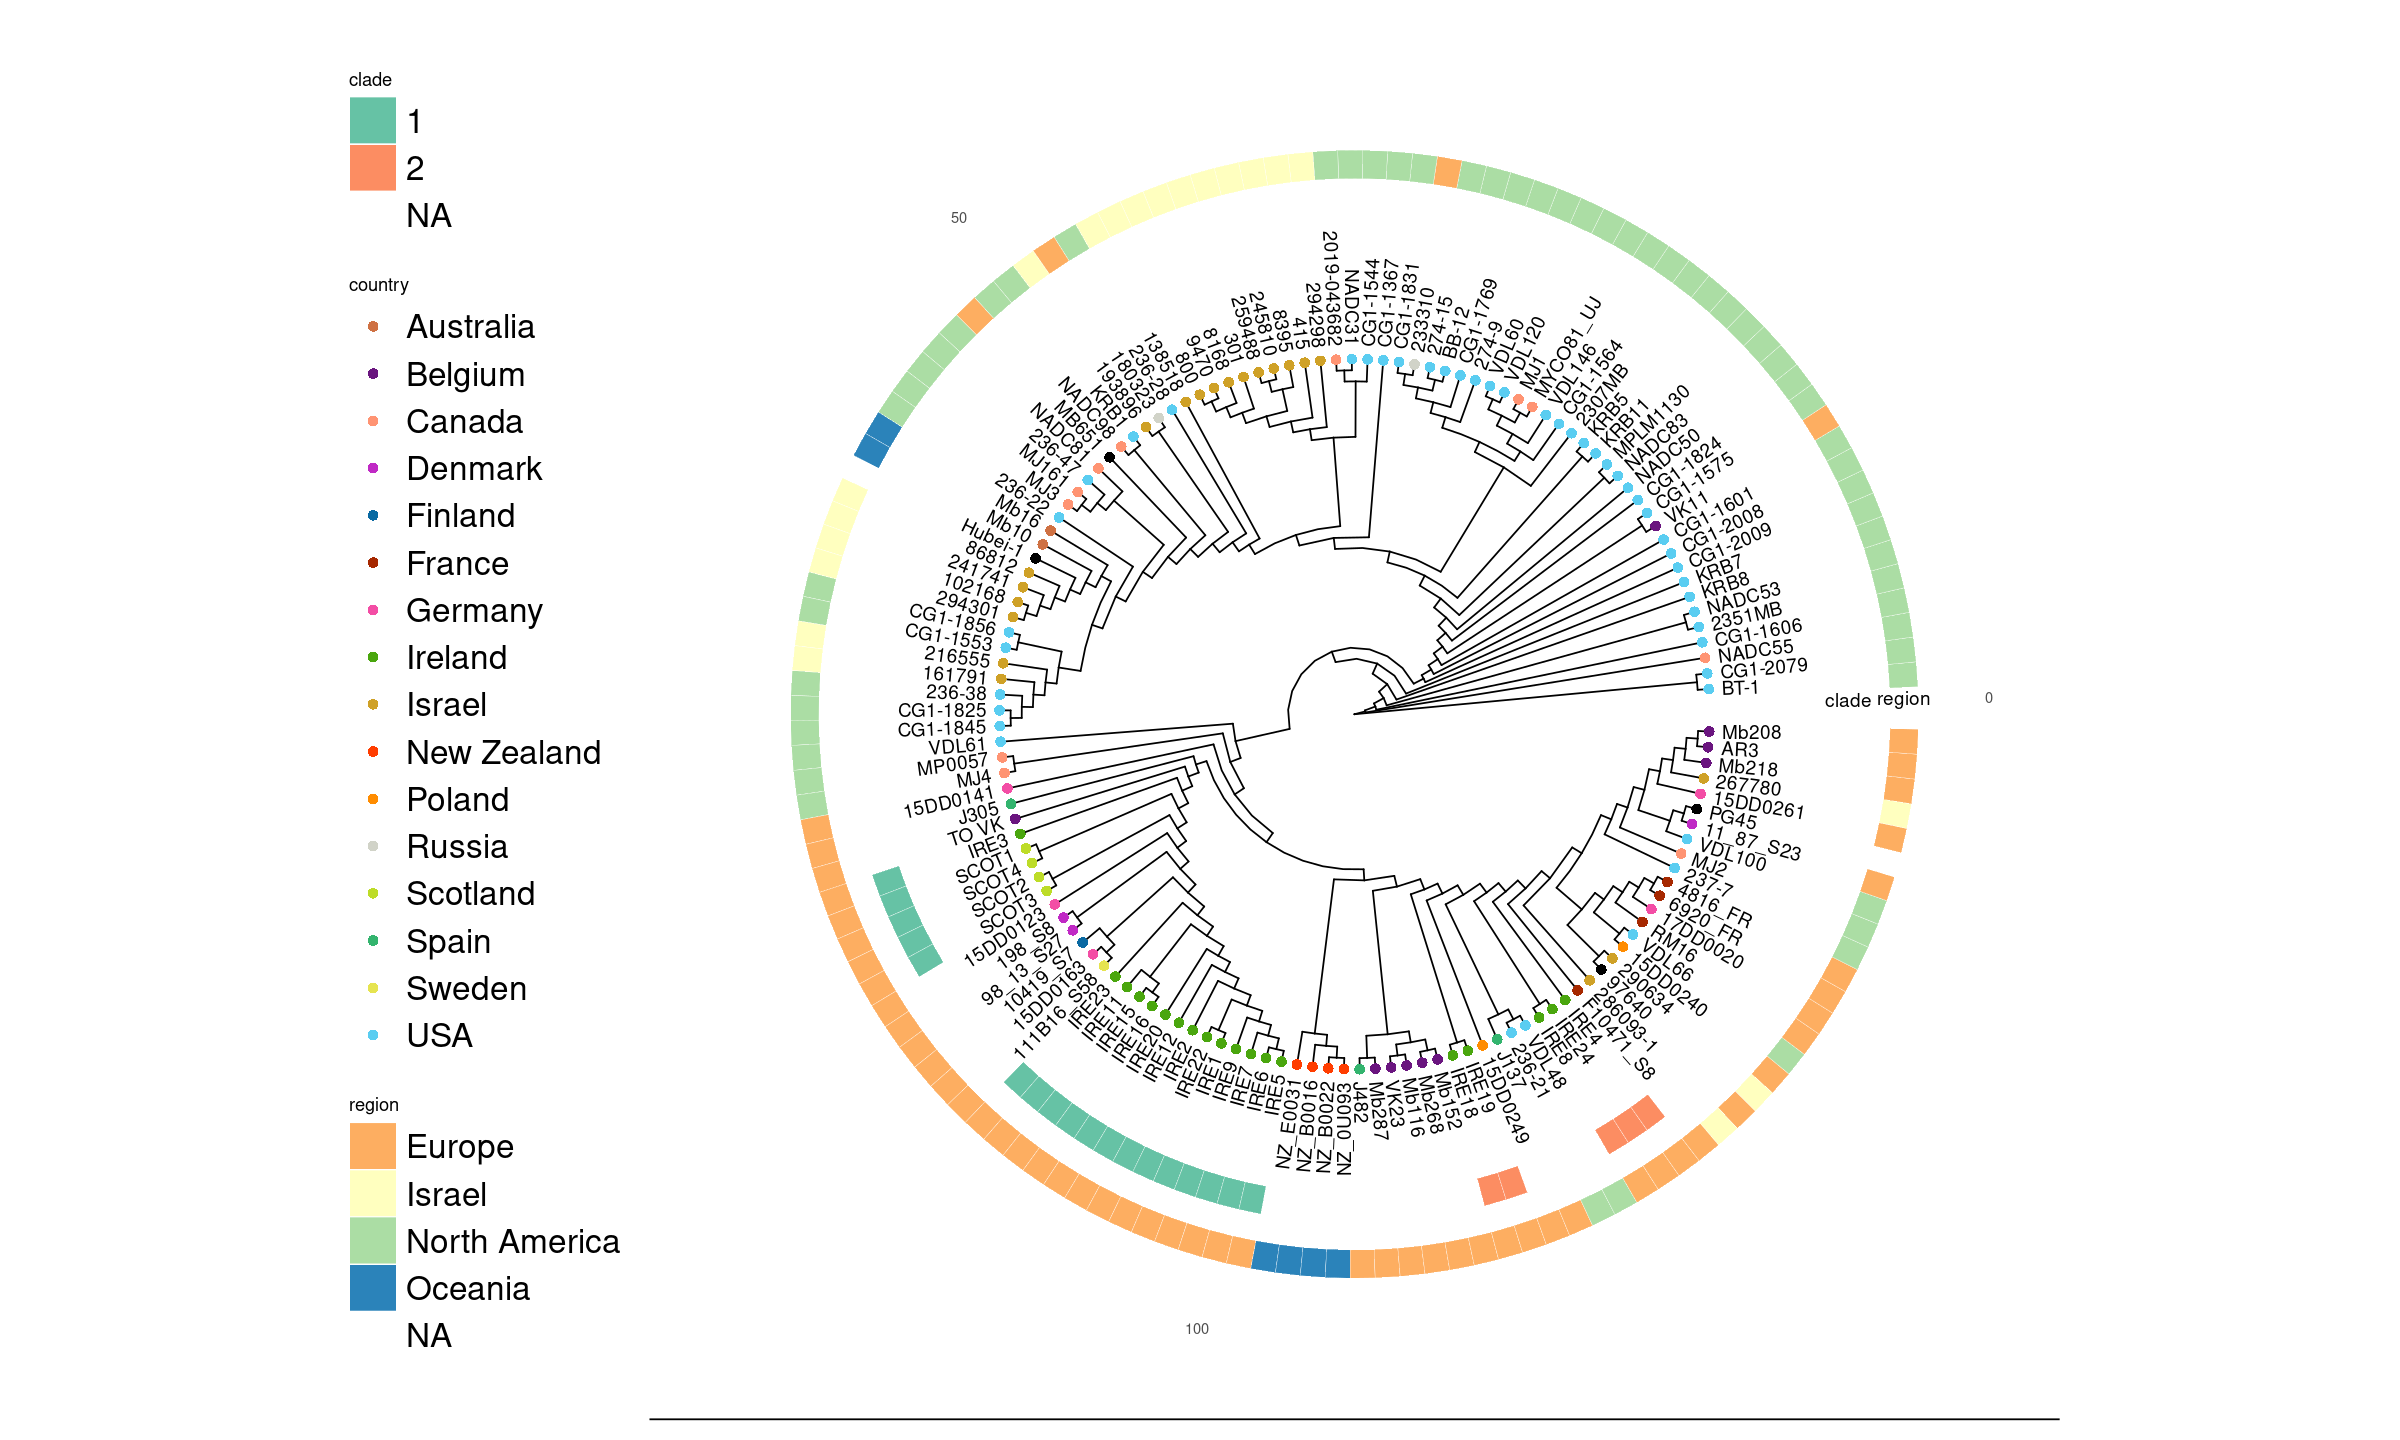

In [83]:
p <- ggplottree(ctree, gmeta, layout="cladogram", colors=mycolors,
           cols=c('country','clade','region'), cmaps=c('Set1','Set2','Spectral'), tiplabel=TRUE, tiplabelcol='strain',
           tipsize=3,offset=5,tipoffset=1,tiplabelsize=4)
p

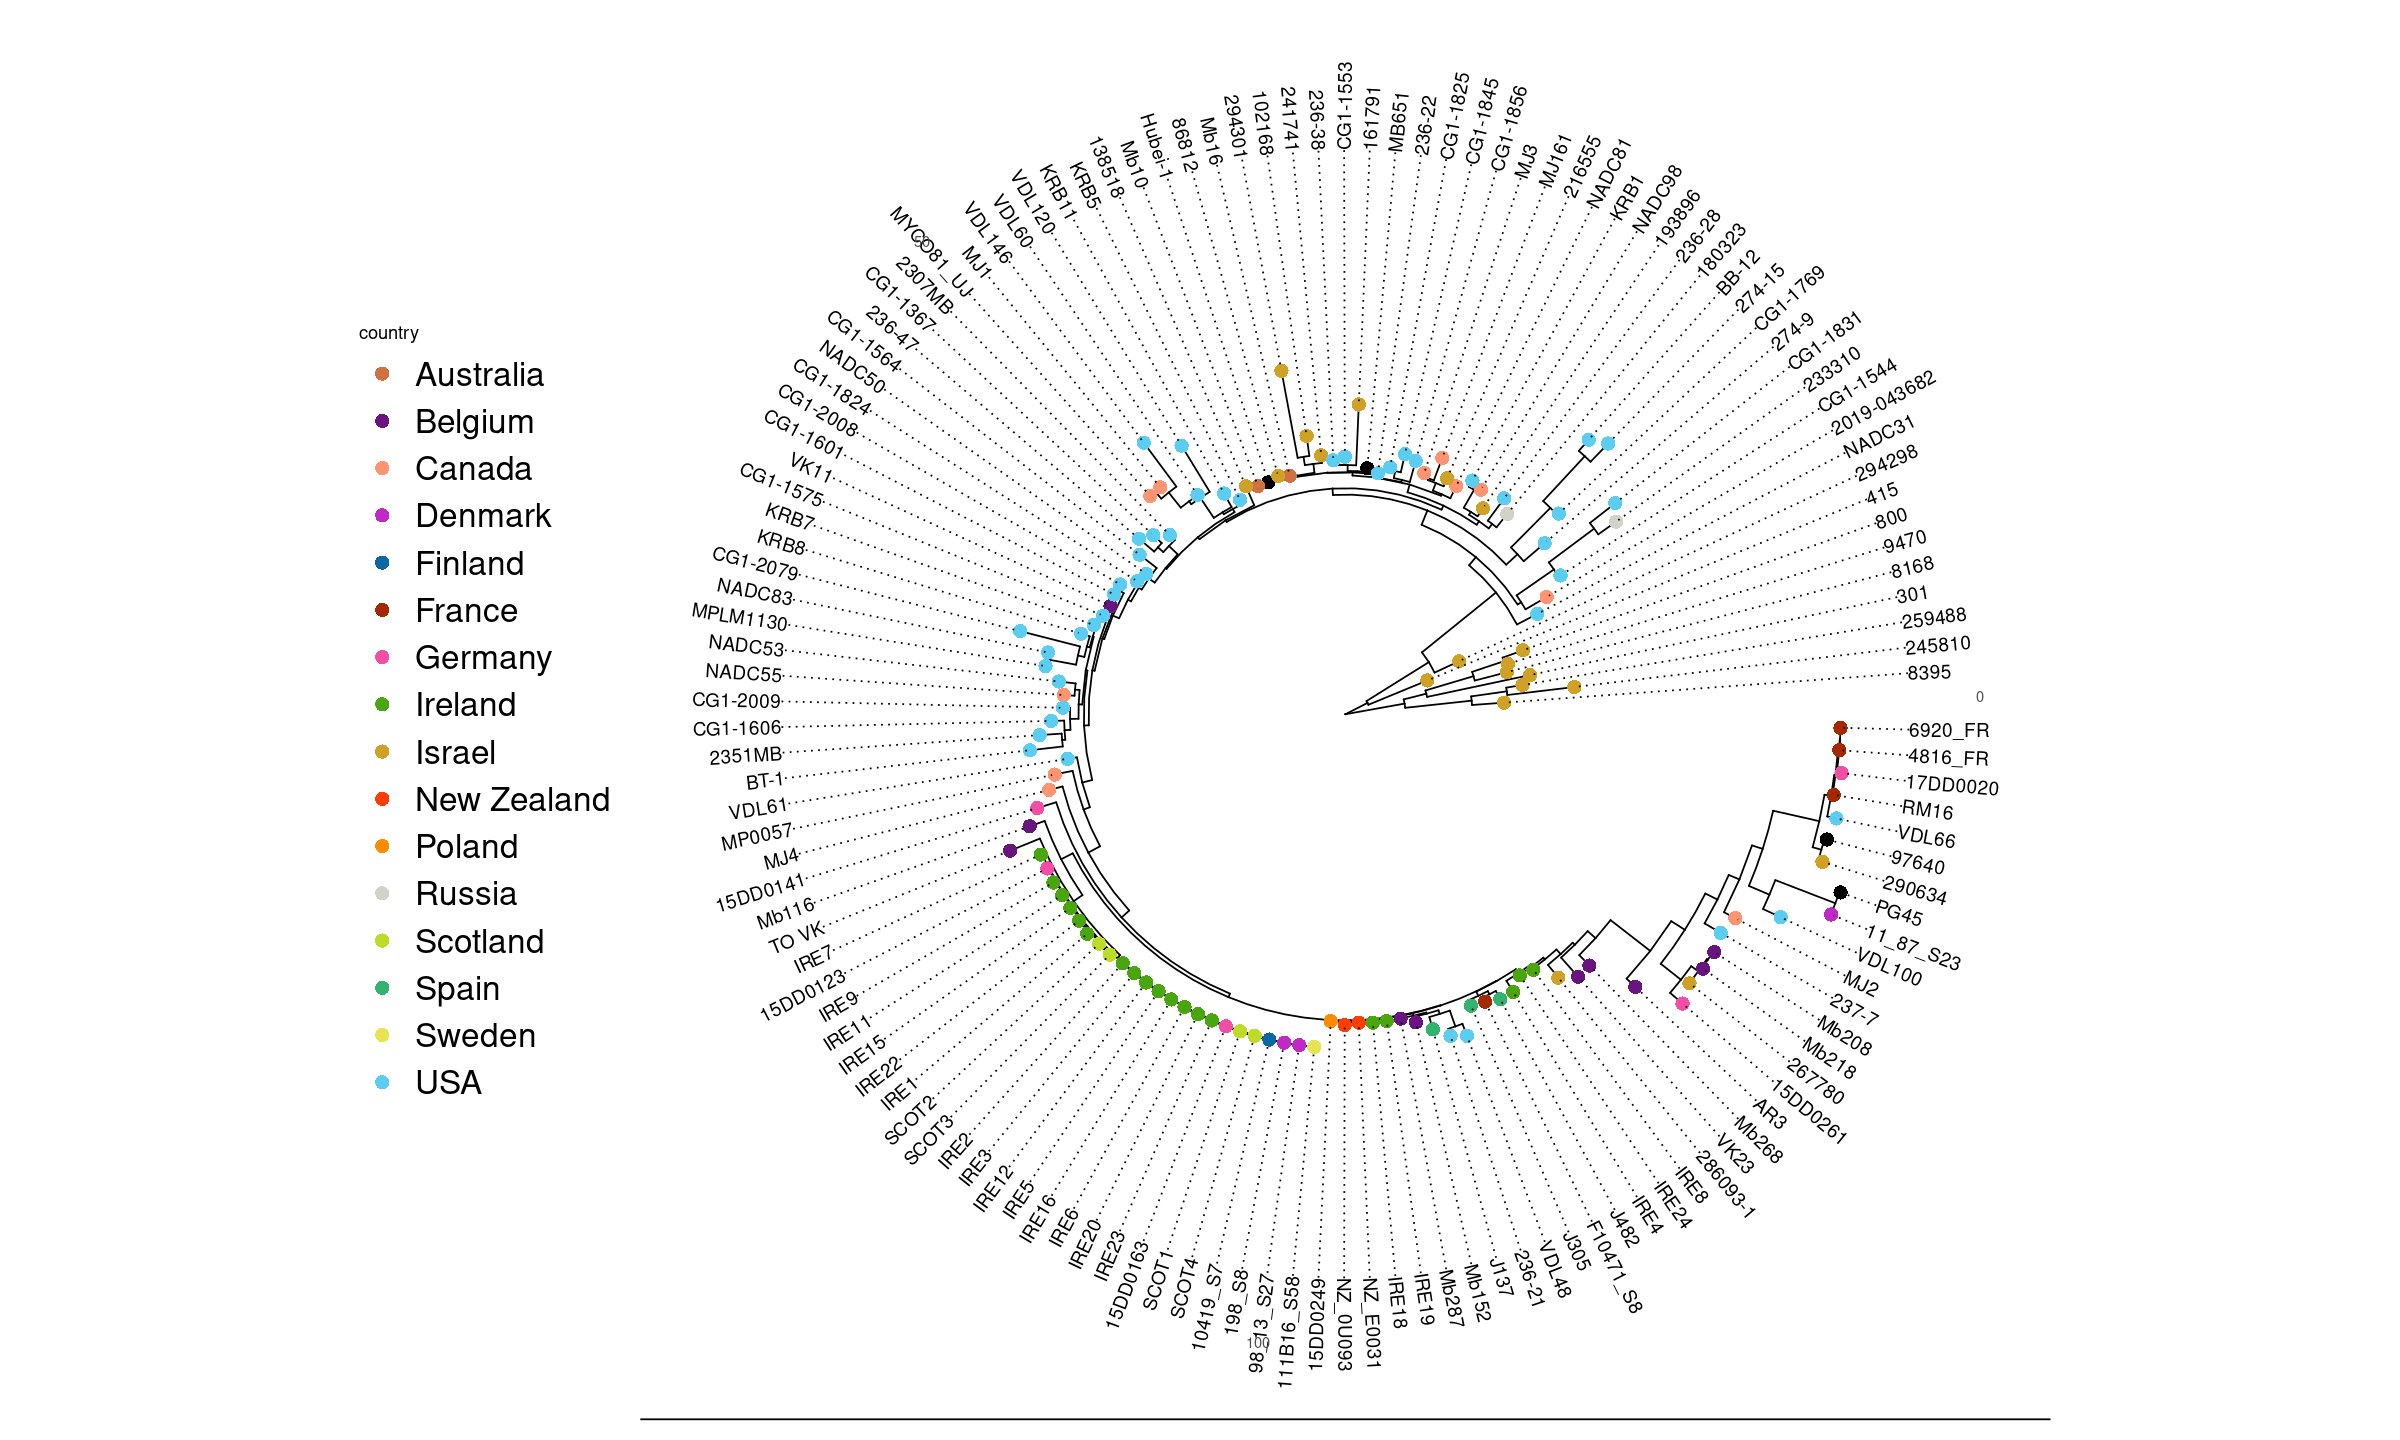

In [316]:
options(repr.plot.width=20, repr.plot.height=12)
tr<-drop.tip(ktree,'NC_009497')
p <- ggplottree(tr, gmeta, layout="c", colors=mycolors,
           cols=c('country'), cmaps=c('Set1'), tiplabel=TRUE, tiplabelcol='strain',
           tipsize=4,offset=.0001,tipoffset=.02,tiplabelsize=4, align=TRUE)
#collapse USA and israel clades
#p <- collapse(p, node=160)
#p <- collapse(p, node=204)
#p <- p + geom_text2(aes(subset=(node=120)), cex=1.5, vjust=0.2, label="Israel", hjust = -.5)
p

## VSP

In [ ]:
options(repr.plot.width=20, repr.plot.height=12)
ggplottree(ctree, gmeta, layout="rect", colors=mycolors, 
           cols=c('country','vspB','vspN','vspJ','vspA','vspF','vspG','vspH','vspN','vspL','vspO','rpmB','rplS'), 
           cmaps=c('Set1','Blues'),
           tipsize=3.5,offset=.08,tiplabel=FALSE,tiplabelsize=3) #+ xlim(NA, 1.1)

## clustermap for DM

In [ ]:
#mrca <- findMRCA(rtree, c('241','SRR12673053','SRR12686385'))
#tr <- extract.clade(rtree,mrca)
tips <- c('243-B21','241','227','245','SRR12673053','SRR12686385','GB18001319')
tr <- keep.tip(tree, tips)
options(repr.plot.width=16, repr.plot.height=8)
ggplottree(tr, gmeta, layout='rect', colors=mycolors, cols=c('country'), cmaps=c('Set1'),tipsize=7, tiplabel=TRUE)


In [51]:
#aln <- read.dna("ksnp_reduced/core_SNPs_matrix.fasta", format = "fasta")
aln <- read.dna("panaroo_global/core_gene_alignment_filtered.aln", format = "fasta")
s=ctree$tip.label
subaln <- aln[s,]
dm <- dist.dna(subaln)
dm[is.na(dm)] <- 0
#dm <- dm*l
#rownames(dm) = s

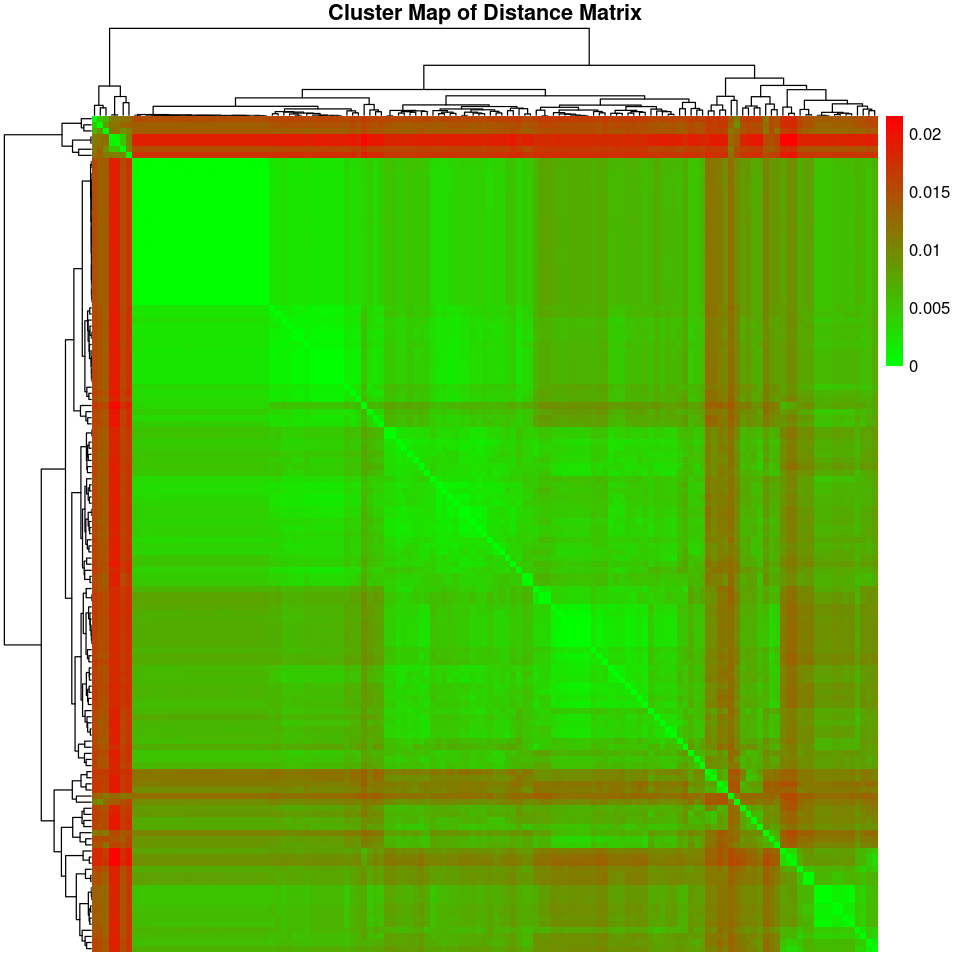

In [52]:
library(pheatmap)

# Create a hierarchical clustering object
hc_rows <- hclust(dist(dm))
hc_cols <- hclust(dist(t(dm)))

# Create a cluster map using pheatmap
options(repr.plot.width=8, repr.plot.height=8)
pheatmap(
  dm,
  cluster_rows = hc_rows,
  cluster_cols = hc_cols,
  color = colorRampPalette(c("green", "red"))(100),
  main = "Cluster Map of Distance Matrix",
  annotation_col = row.names(hc_cols),
)

## PCA

Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


old_name,strain,sample_title,organism,isolate,host,isolation_source,collection_date,year,county,⋯,id,AssemblyAccession,BioSampleAccn,BioSampleId,SubmitterOrganization,geo_loc_name,region,species,ST,color
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>


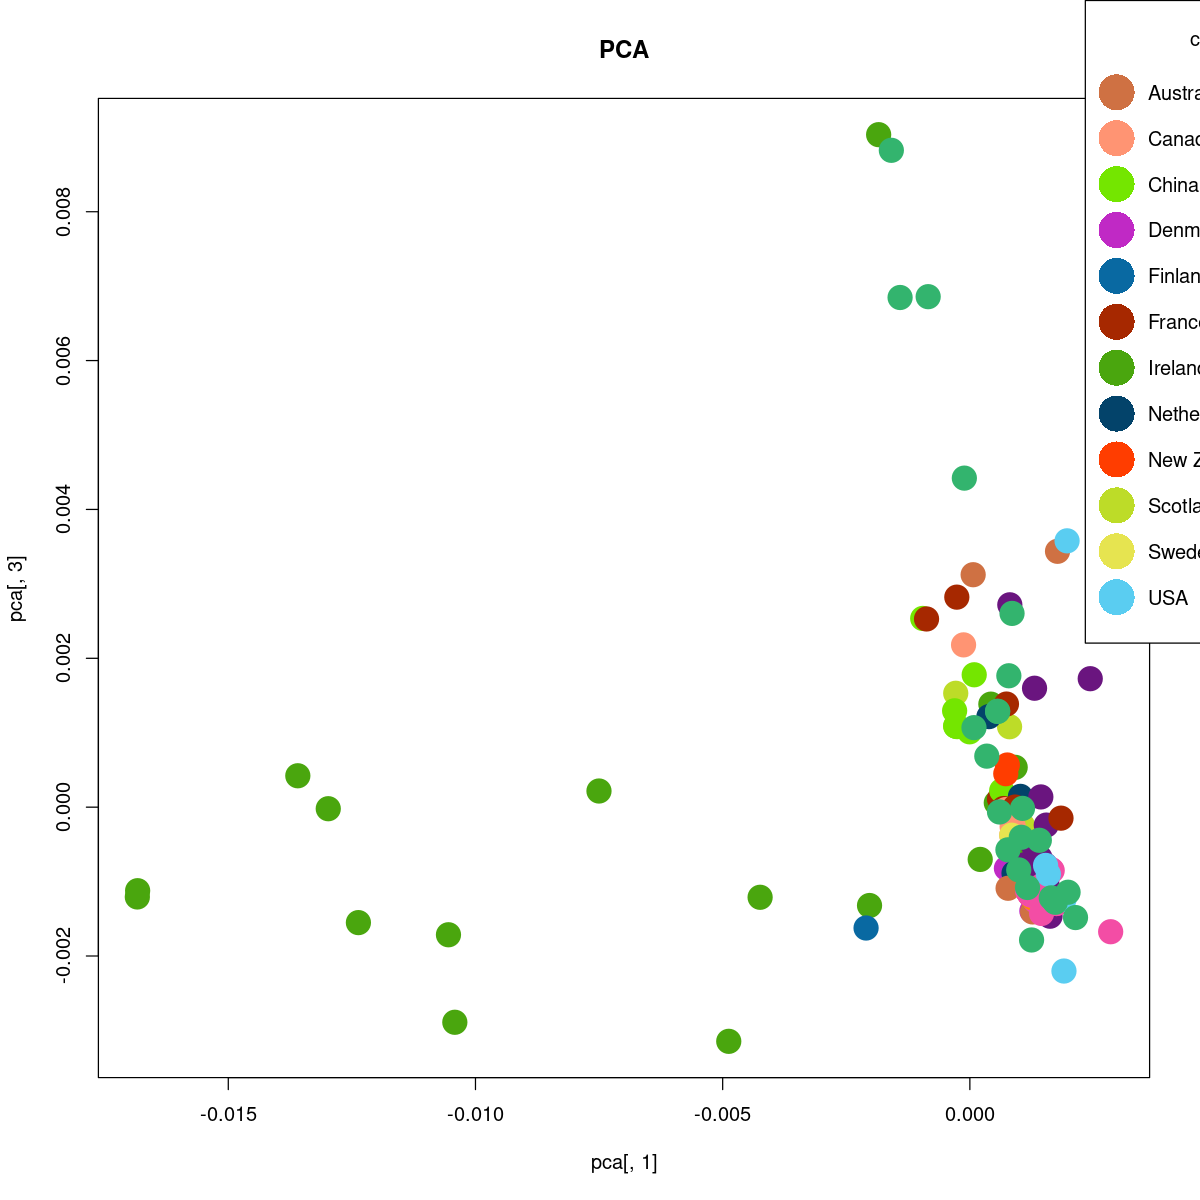

In [57]:
samples <- tr$tip.label
pca <- cmdscale(dm, k=3)
groups <- as.factor(meta$country)
df <- gmeta[row.names(dm)]

gmeta$color <- mycolors[gmeta$country]
options(repr.plot.width=10, repr.plot.height=10)
plot(pca[, 1], pca[, 3], pch=20, col = gmeta$color, main = "PCA", cex=4)
par(mar=c(8, 0, 4, 8.1), xpd=TRUE)
legend("topright", inset=c(-0.2,-.1), legend=levels(groups), 
       col=mycolors[levels(groups)], cex=1, pt.cex = 4,pch=16, title = "country")